In [13]:
import torch
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

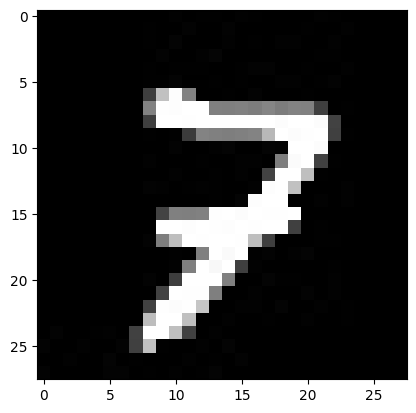

torch.Size([1, 28, 28, 3])


In [14]:
# 先来看看这个网络每一层都做了什么吧
img = cv.imread('7.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


img_rgb = np.array(img_rgb)
x = torch.from_numpy(img_rgb).float().unsqueeze(dim=0)

# 别忘了看tensor形状！！！
print(x.shape)

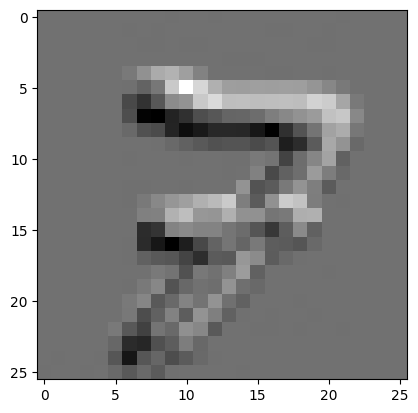

In [15]:
conv1 = torch.nn.Conv3d(in_channels=1, out_channels=1, 
                        kernel_size=(3,3,3),
                        stride=1,
                        padding='valid')
x = conv1(x)

plt.imshow(x.detach().numpy().squeeze(), cmap='gray')
plt.show()

torch.Size([1, 26, 26, 1])


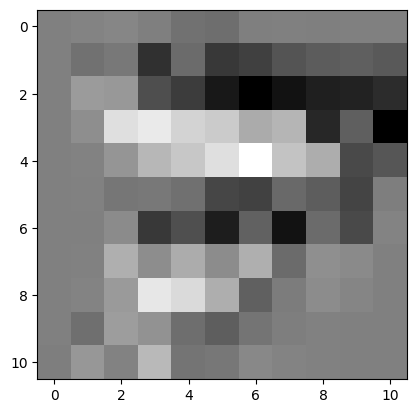

In [16]:
print(x.shape)
conv2 = torch.nn.Conv3d(in_channels=1, out_channels=1, 
                        kernel_size=(5,5,1),
                        stride=2,
                        padding='valid')
x = conv2(x)

plt.imshow(x.detach().numpy().squeeze(), cmap='gray')
plt.show()

torch.Size([1, 4, 4, 1])


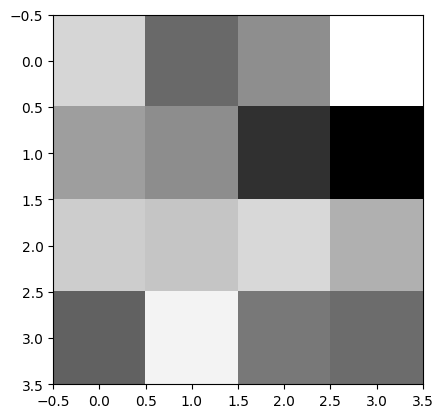

In [17]:
conv3 = torch.nn.Conv3d(in_channels=1, out_channels=1, 
                        kernel_size=(5,5,1),
                        stride=2,
                        padding='valid')
x = conv3(x)
print(x.shape)
plt.imshow(x.detach().numpy().squeeze(), cmap='gray')
plt.show()

In [18]:
# 分成10类 flatten用来拉直，linear用来整合
x = torch.flatten(x, start_dim=1)
linear = torch.nn.Linear(in_features=4*4*1, out_features=10)
x = linear(x)

print(x.shape)

torch.Size([1, 10])


好了👇下面是完整训练过程

In [36]:
# 导入包
import torch
import torchvision
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import cv2


# 数据集加载
train_dataset = datasets.MNIST(root='data/', train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data/', train=True,
                               transform=transforms.ToTensor(),
                               download=True)

# 打包
train_loader = DataLoader(dataset = train_dataset, 
                          batch_size = 64, 
                          shuffle = True)

test_loader = DataLoader(dataset = test_dataset, 
                         batch_size= 64, 
                         shuffle = True)


# 模型部分
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.relu = torch.nn.ReLU()

        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=1, 
                        kernel_size=3,
                        stride=1,
                        padding='valid')
        
        self.conv2 = torch.nn.Conv2d(in_channels=1, out_channels=1, 
                        kernel_size=5,
                        stride=2,
                        padding='valid')
        
        self.conv3 = torch.nn.Conv2d(in_channels=1, out_channels=1, 
                        kernel_size=5,
                        stride=2,
                        padding='valid')

        self.linear = torch.nn.Linear(in_features=1*4*4, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        # print(x.shape)

        x = self.conv2(x)
        x = self.relu(x)
        # print(x.shape)

        x = self.conv3(x)
        # print(x.shape)
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x


# 损失函数与优化方法 分类问题一般用交叉熵做损失函数
device = torch.device('cpu')
model = Model().to(device)
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

if __name__ == "__main__":

    # 一共训练5轮
    epochs = 5

    print(len(train_dataset))
    print(len(test_dataset))

    for epoch in range(epochs) :
        # train
        sum_loss = 0.0
        train_correct = 0
        for data in train_loader:
            inputs, lables = data
            inputs, lables = Variable(inputs), Variable(lables)
            optimizer.zero_grad()
            outputs = model(inputs)
            # print(outputs.shape)
            loss = cost(outputs, lables)
            loss.backward()
            optimizer.step()

            _, id = torch.max(outputs.data, 1)
            sum_loss += loss.data
            train_correct += torch.sum(id == lables.data)

        print('[%d,%d] loss:%.03f' % (epoch + 1, epochs, sum_loss / len(train_loader)))
        print('        correct:%.03f%%' % (100 * train_correct / len(train_dataset)))


    # 测试
    model.eval()
    test_correct = 0
    for data in test_loader:
        inputs, lables = data
        inputs, lables = Variable(inputs), Variable(lables)
        outputs = model(inputs)
        _, id = torch.max(outputs.data, 1)
        test_correct += torch.sum(id == lables.data)
    print("correct:%.3f%%" % (100 * test_correct / len(test_dataset)))


60000
60000
[1,5] loss:0.898
        correct:72.257%
[2,5] loss:0.551
        correct:84.055%
[3,5] loss:0.507
        correct:85.237%
[4,5] loss:0.483
        correct:85.985%
[5,5] loss:0.471
        correct:86.337%
correct:86.677%


最后一个东西，临时兴起补充一下，上面的网络如果padding了会怎么样？

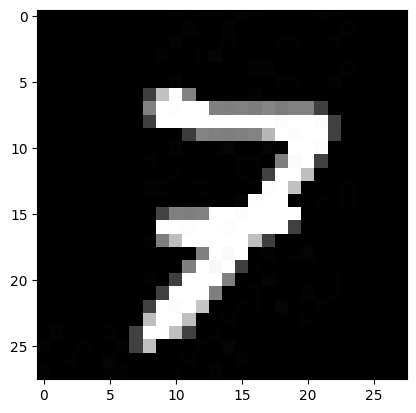

torch.Size([1, 28, 28])


In [79]:
img_p = cv.imread('7.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_p, cmap='gray')
plt.show()


img_p = np.array(img_p)
x_p = torch.from_numpy(img_p).float().unsqueeze(dim=0)

print(x_p.shape)

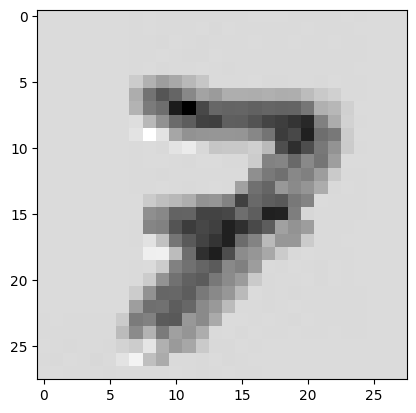

In [80]:
conv1_p = torch.nn.Conv2d(in_channels=1, out_channels=1, 
                        kernel_size=3,
                        stride=1,
                        padding='same')
x_p = conv1_p(x_p)

plt.imshow(x_p.detach().numpy().squeeze(), cmap='gray')
plt.show()

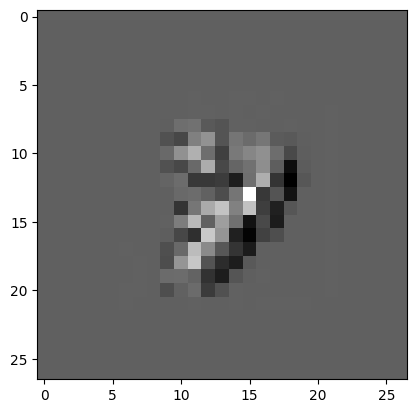

In [81]:
conv2_p = torch.nn.Conv2d(in_channels=1, out_channels=1, 
                        kernel_size=5,
                        stride=2,
                        padding=15)
x_p = conv2_p(x_p)

plt.imshow(x_p.detach().numpy().squeeze(), cmap='gray')
plt.show()

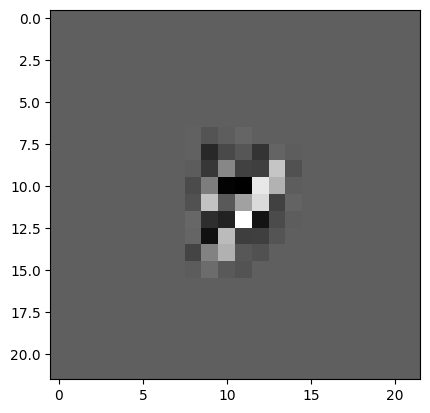

In [82]:
conv3_p = torch.nn.Conv2d(in_channels=1, out_channels=1, 
                        kernel_size=5,
                        stride=2,
                        padding=10)
x_p = conv3_p(x_p)

plt.imshow(x_p.detach().numpy().squeeze(), cmap='gray')
plt.show()